**This Notebook is created for the solutions for "COMP338 Computer Vision - Lab 2"** \\
Note: This is just an example solution. I create the Gaussian and Convolution functions and  from scratch. You can load Gaussian functions from some liberaries, however, it would be good to understand how these functions are constructed.

In [3]:
import numpy as np
from google.colab.patches import cv2_imshow
import cv2
import argparse
import math

Define the convolution function

In [52]:
def convolution(image, kernel, average=False):
    if len(image.shape) == 3:
        print("Found 3 Channels : {}".format(image.shape))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        print("Converted to Gray Channel. Size : {}".format(image.shape))
    else:
        print("Image Shape : {}".format(image.shape))

    print("Kernel Shape : {}".format(kernel.shape))

    image_row, image_col = image.shape
    kernel_row, kernel_col = kernel.shape
    
    #We will have the size of the output image same as that of the input image
    output = np.zeros(image.shape)
    
    #We will pad zeros around the boundaries around the image
    #This padding size maintains the image size
    pad_height = int((kernel_row - 1) / 2)
    pad_width = int((kernel_col - 1) / 2)

    #This is padded image (now are all zeros)
    padded_image = np.zeros((image_row + (2 * pad_height), image_col + (2 * pad_width)))
    #Fill the padded image with the values of the input image for corresponding pixels
    padded_image[pad_height:padded_image.shape[0] - pad_height, pad_width:padded_image.shape[1] - pad_width] = image
    
    #Here the convolution is performed. We have a window to slide over the padded image.
    #From top to bottom
    for row in range(image_row):
         #From left to right
        for col in range(image_col):
            #Convoultion: 
            #1. Get the product of the values of the corresponding pixels in both the kelnel and the patch of the padded image 
            #2. Sum up all the products to get the output for this specific pixel.
            output[row, col] = np.sum(kernel * padded_image[row:row + kernel_row, col:col + kernel_col])
            if average:
                output[row, col] /= kernel.shape[0] * kernel.shape[1]

    print("Output Image size : {}".format(output.shape))

    return output

Define the Gaussian filters

In [53]:
#This is the Gaussian function
def dnorm(x, mu, sd):
    return 1 / (np.sqrt(2 * np.pi) * sd) * np.e ** (-np.power((x - mu) / sd, 2) / 2)

def gaussian_kernel(size, sigma=1):
    #We get a 1-D Gaussian kenel first
    kernel_1D = np.linspace(-(size // 2), size // 2, size)
    for i in range(size):
        kernel_1D[i] = dnorm(kernel_1D[i], 0, sigma)
    #A 2D Gaussian distribution is just the product of two 1D Gaussian distributions
    #（if there are no correlation between the two axes）
    #See more: https://stackoverflow.com/questions/7687679/how-to-generate-2d-gaussian-with-python
    kernel_2D = np.outer(kernel_1D.T, kernel_1D.T)

    kernel_2D *= 1.0 / kernel_2D.max()

    return kernel_2D

def gaussian_blur(image, kernel_size, sigma):
    #A common setting: sigma=math.sqrt(kernel_size)
    kernel = gaussian_kernel(kernel_size, sigma)
    return convolution(image, kernel, average=True)

Load the image

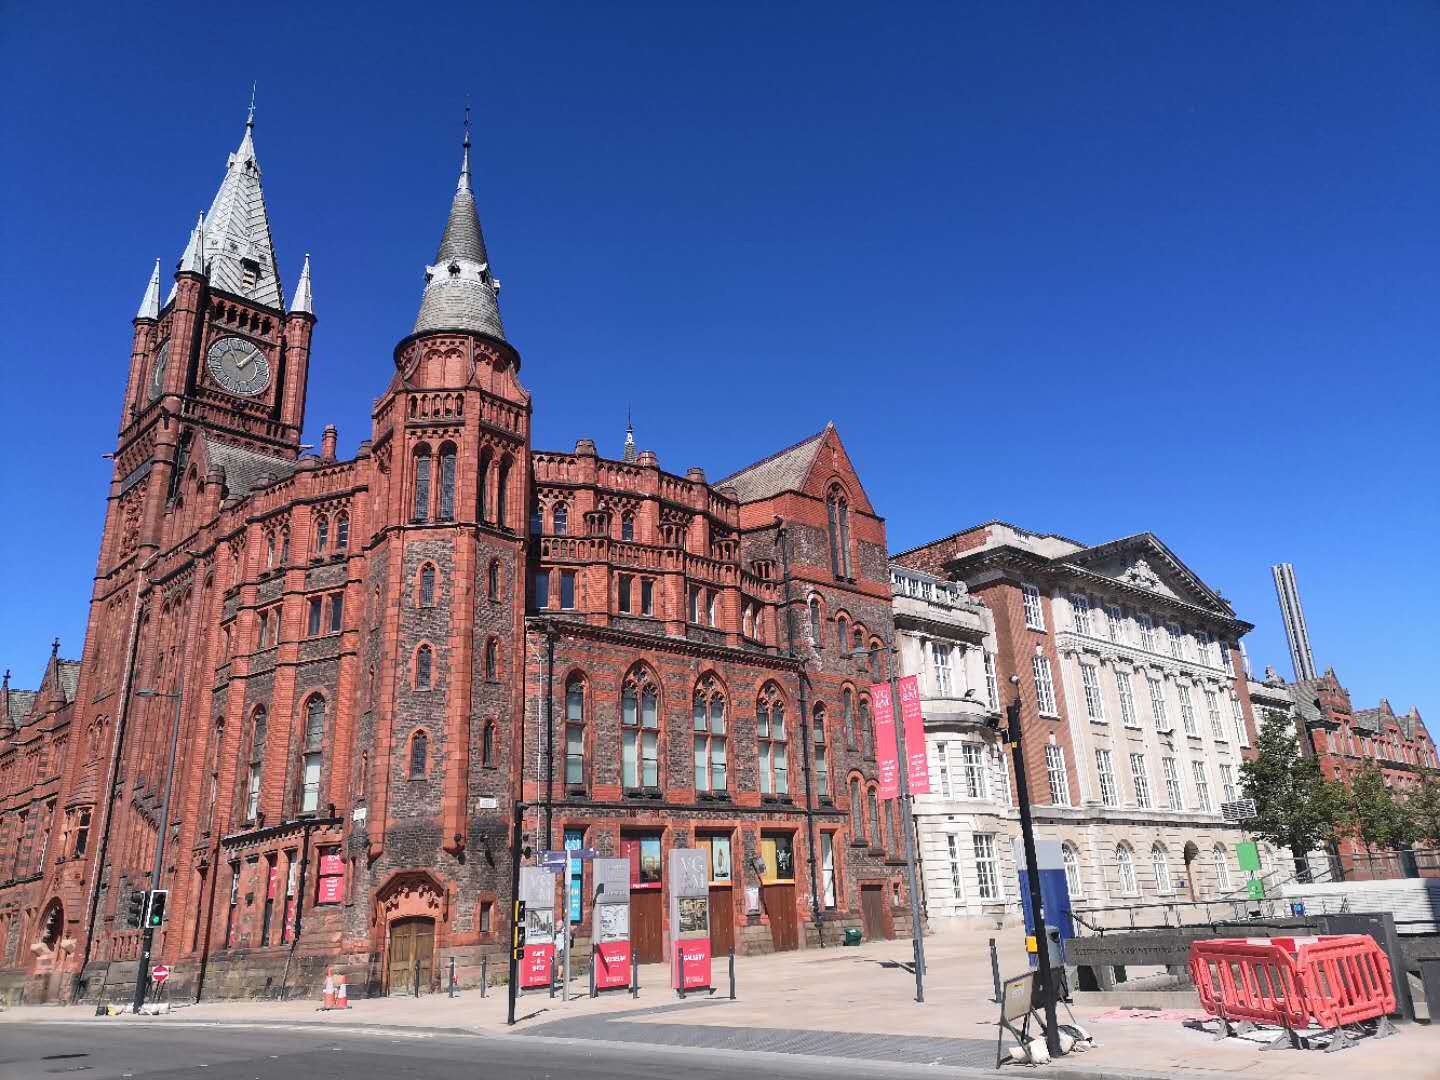

In [54]:
#Read an image from the Drive
img = cv2.imread('/content/drive//My Drive/ColabNotebooks/victoria.jpeg')
#Show the image
cv2_imshow(img)
#Convert the image into a greyscale image
img_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

1. Gaussian masks

Image Shape : (1080, 1440)
Kernel Shape : (5, 5)
Output Image size : (1080, 1440)


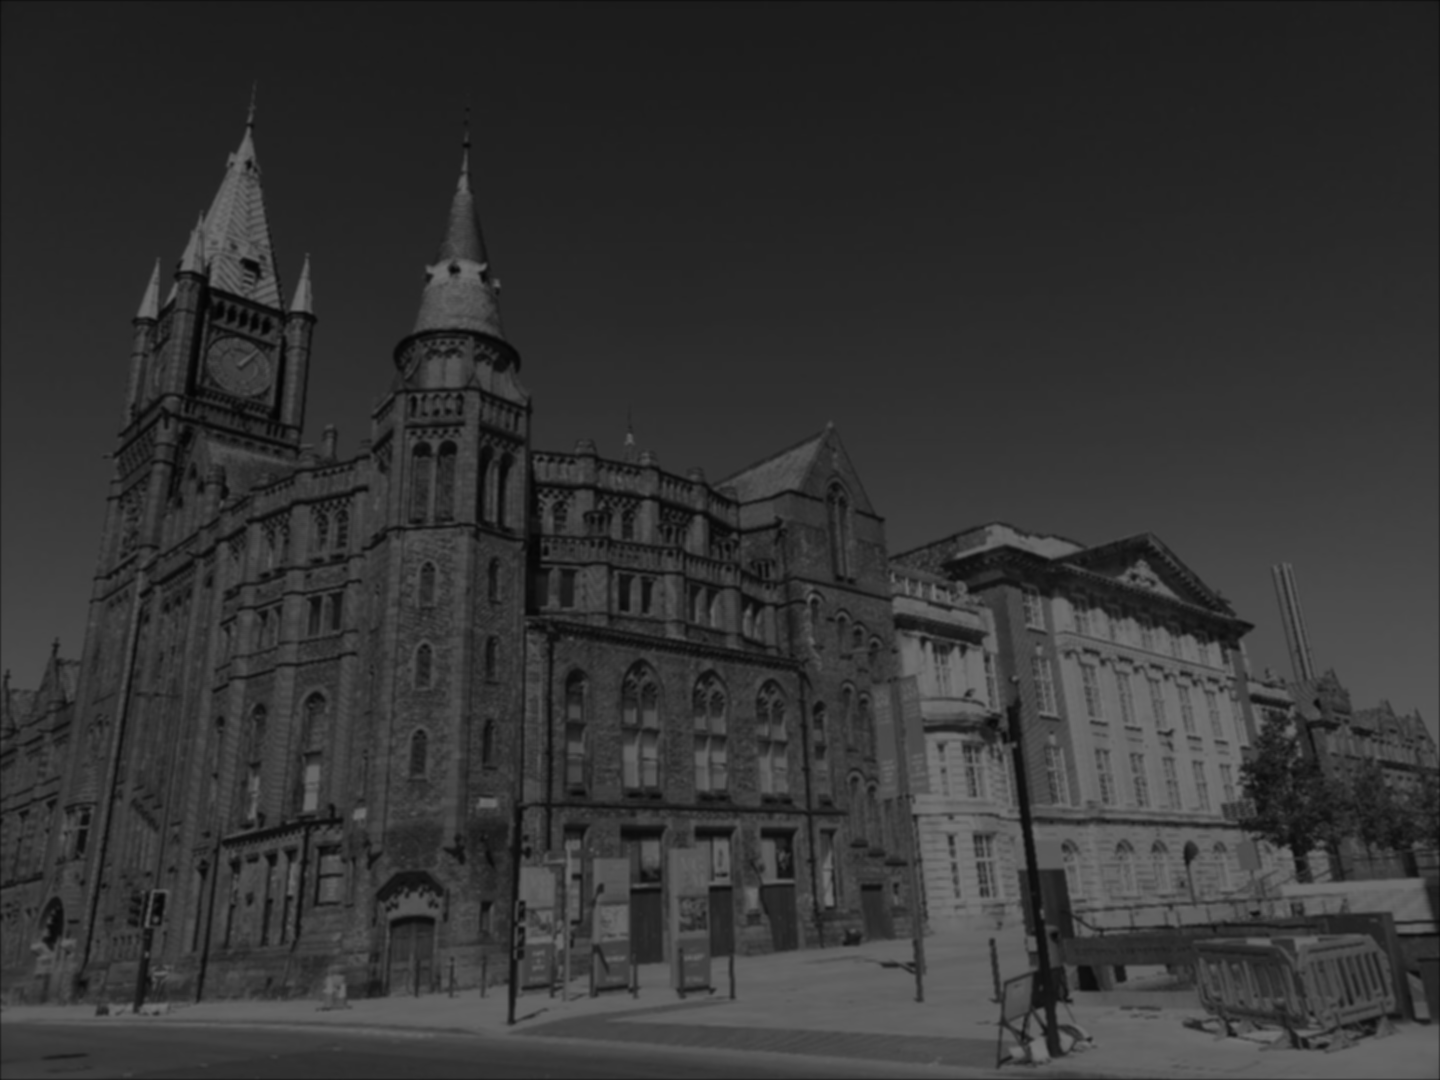

Image Shape : (1080, 1440)
Kernel Shape : (5, 5)
Output Image size : (1080, 1440)


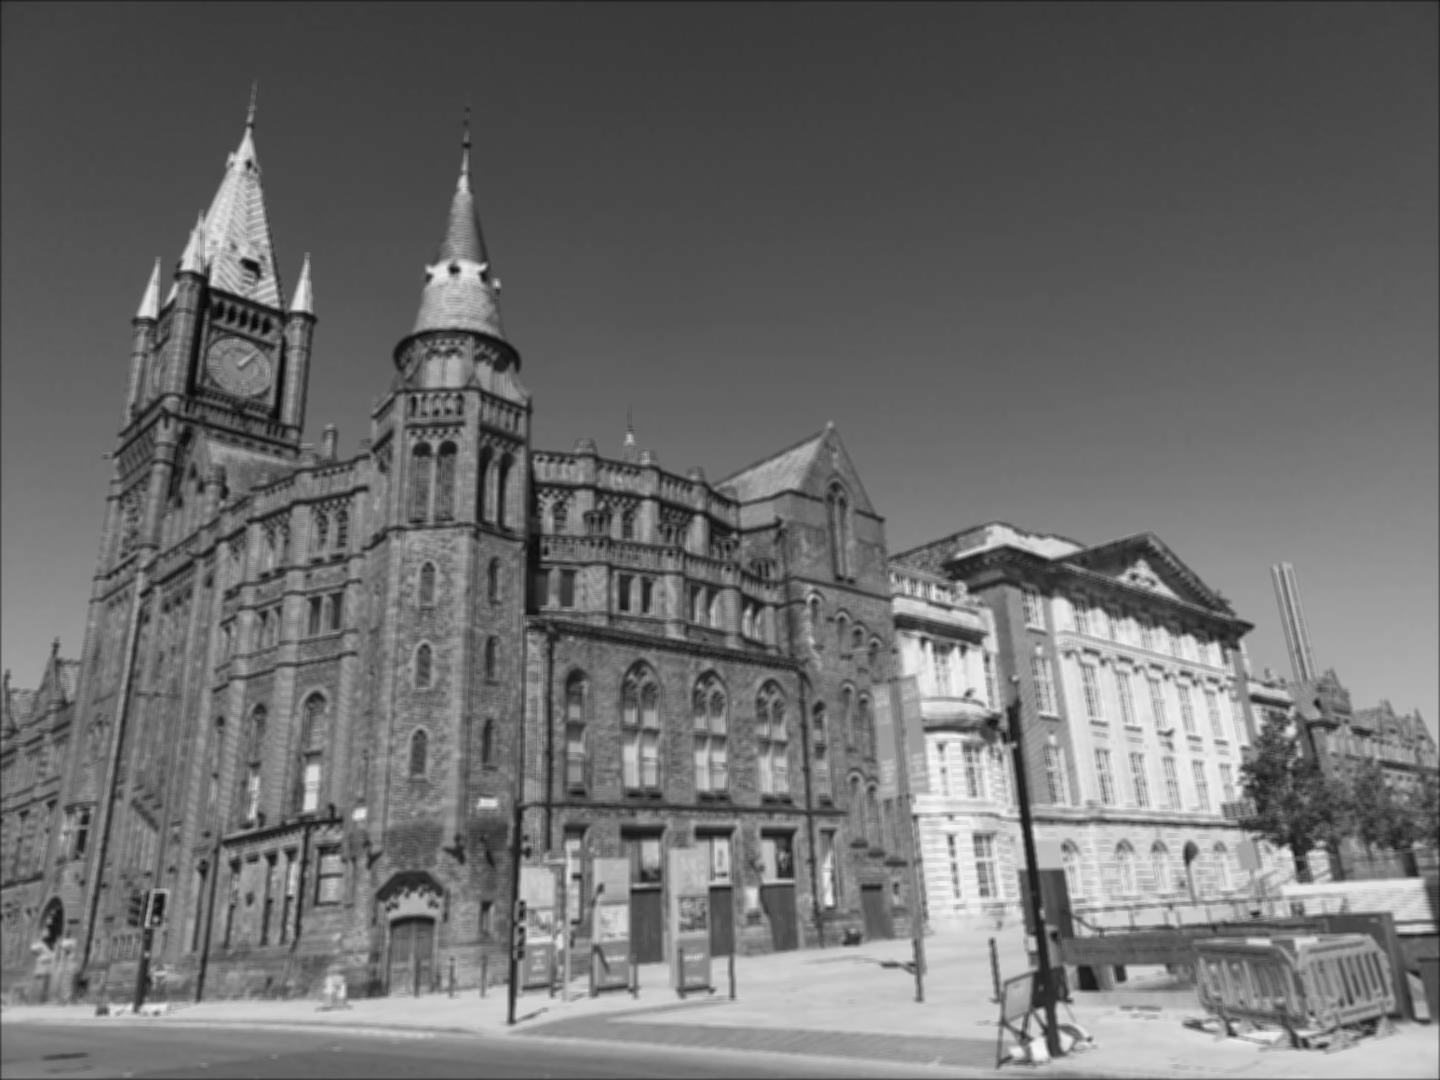

In [55]:
#Gaussian mask: size: 5x5, sigma = 1.5
img_blur1 = gaussian_blur(img_grey, 5, 1.5)
cv2_imshow(img_blur1)
#Gaussian mask: size: 5x5, sigma = 10
img_blur2 = gaussian_blur(img_grey, 5, 10)
cv2_imshow(img_blur2)

2. Difference masks (Laplacian masks)

[[-0.125 -0.125 -0.125]
 [-0.125  1.    -0.125]
 [-0.125 -0.125 -0.125]]
Image Shape : (1080, 1440)
Kernel Shape : (3, 3)
Output Image size : (1080, 1440)


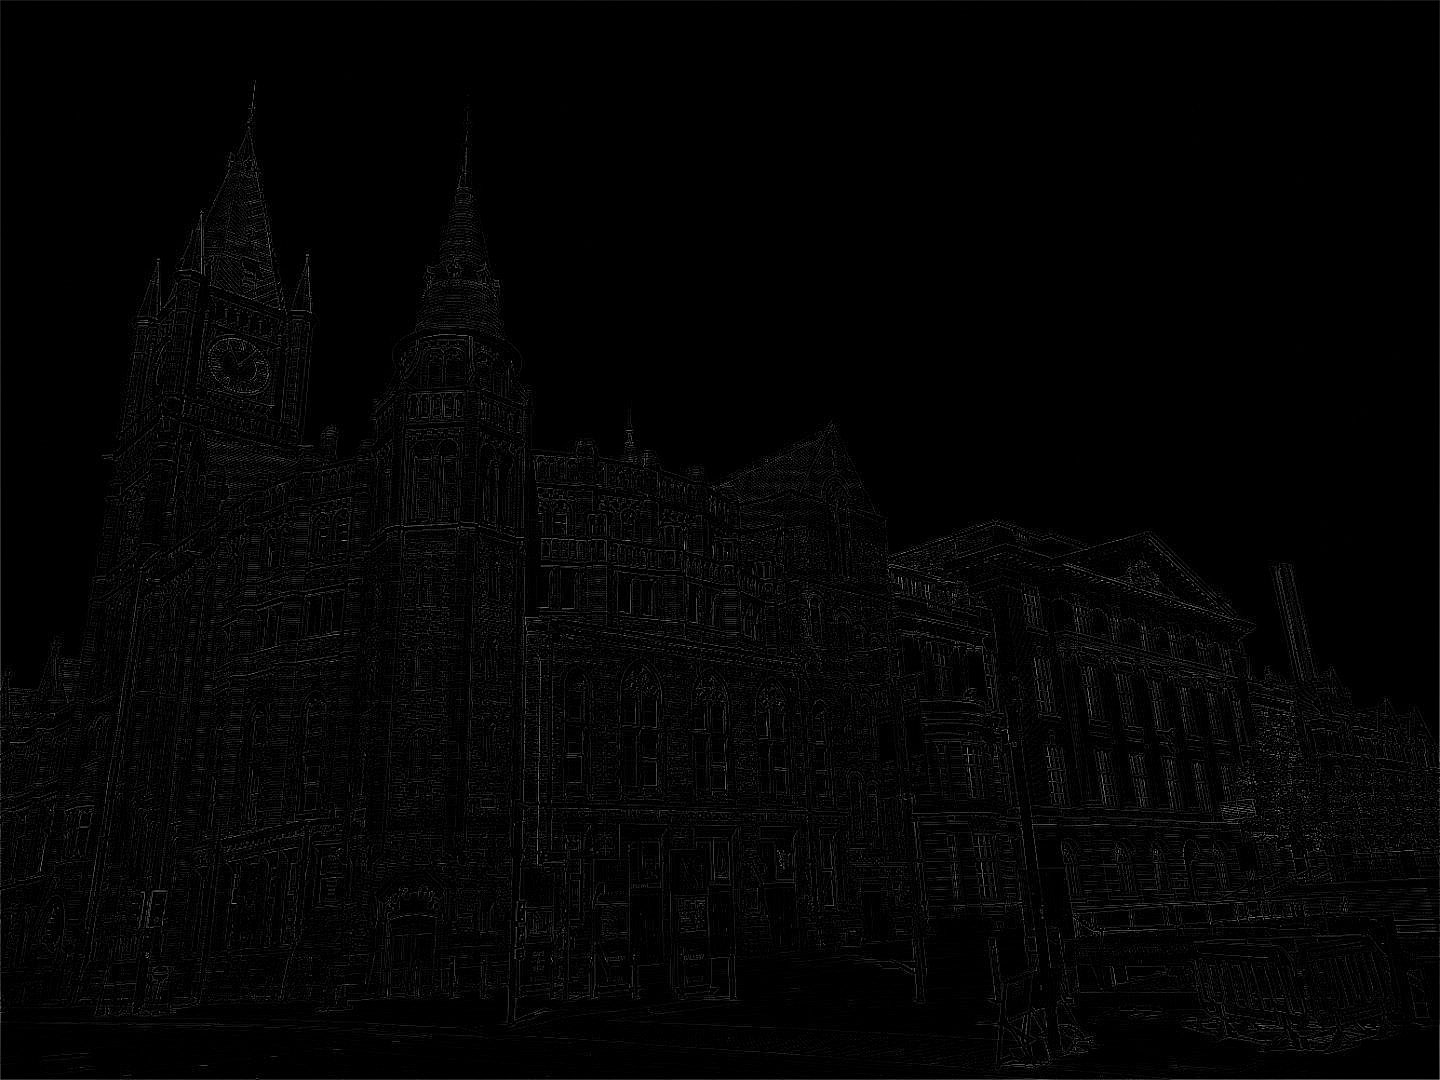

[[-1 -1 -1]
 [-1  8 -1]
 [-1 -1 -1]]
Image Shape : (1080, 1440)
Kernel Shape : (3, 3)
Output Image size : (1080, 1440)


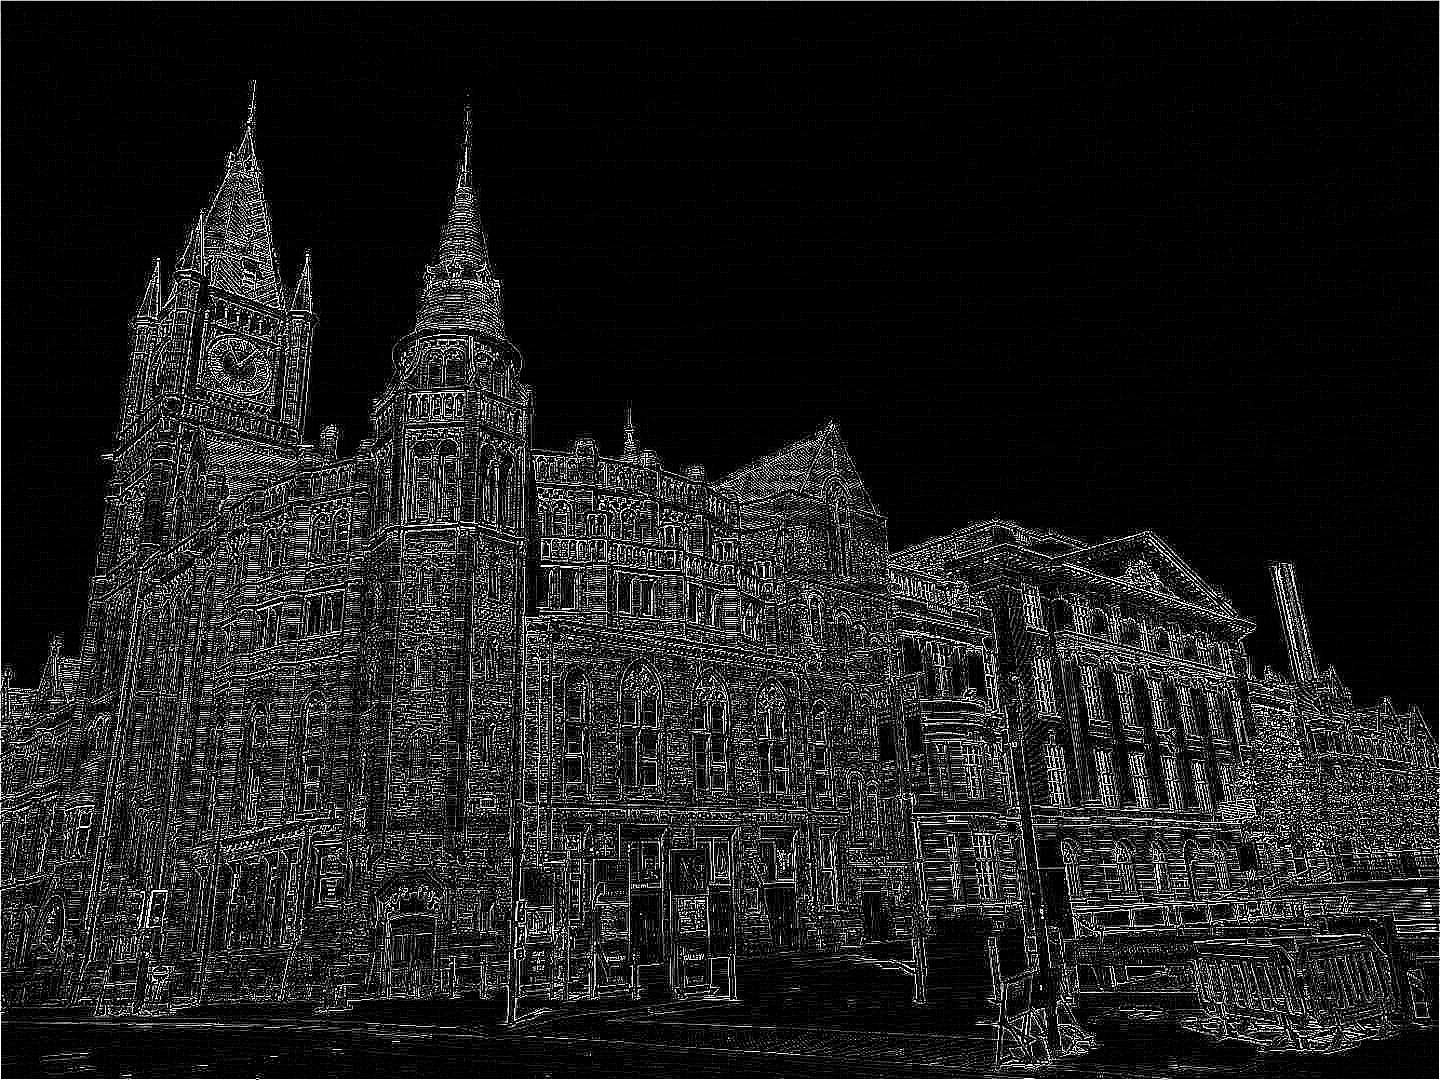

In [56]:
#Laplacian mask 1 
lap_mask1 = np.array([[-1/8, -1/8, -1/8], [-1/8, 1, -1/8], [-1/8, -1/8, -1/8]])
print(lap_mask1)
lap_img1 = convolution(img_grey, lap_mask1, average=False)
cv2_imshow(lap_img1)

#Laplacian mask 2, note, the engery with this mask is different from the last one
lap_mask2 = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
print(lap_mask2)
lap_img2 = convolution(img_grey, lap_mask2, average=False)
cv2_imshow(lap_img2)

3. Gaussian derivative mask

Image Shape : (5, 5)
Kernel Shape : (1, 2)
Output Image size : (5, 5)
Image Shape : (1080, 1440)
Kernel Shape : (5, 5)
Output Image size : (1080, 1440)


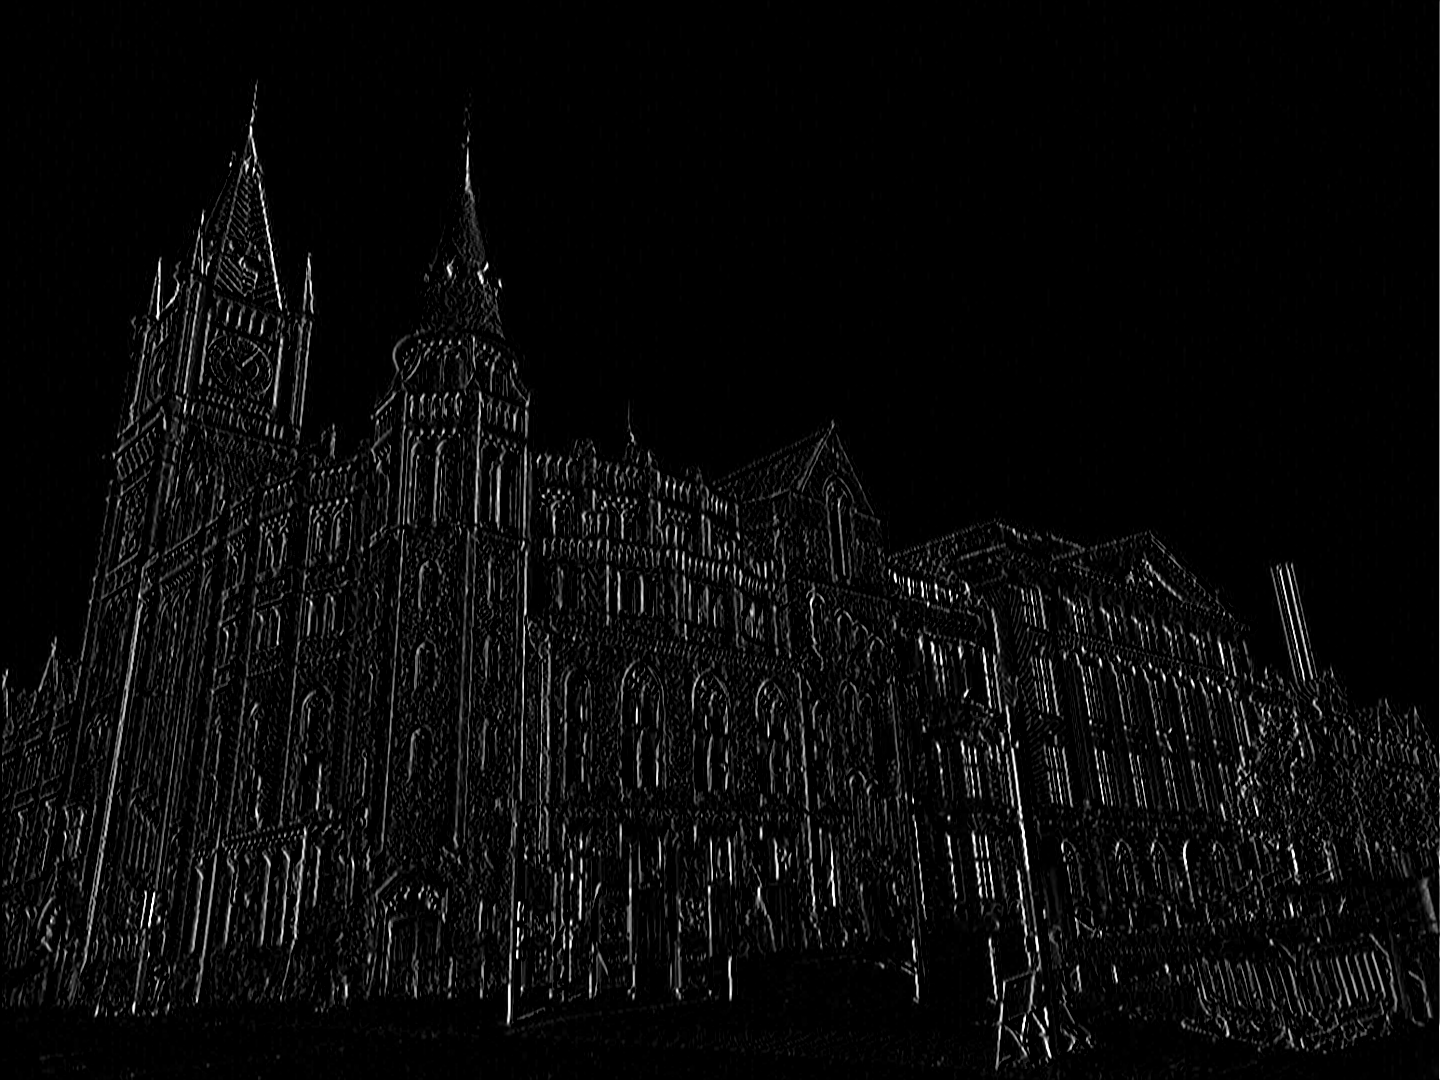

Image Shape : (5, 5)
Kernel Shape : (2, 1)
Output Image size : (5, 5)
Image Shape : (1080, 1440)
Kernel Shape : (5, 5)
Output Image size : (1080, 1440)


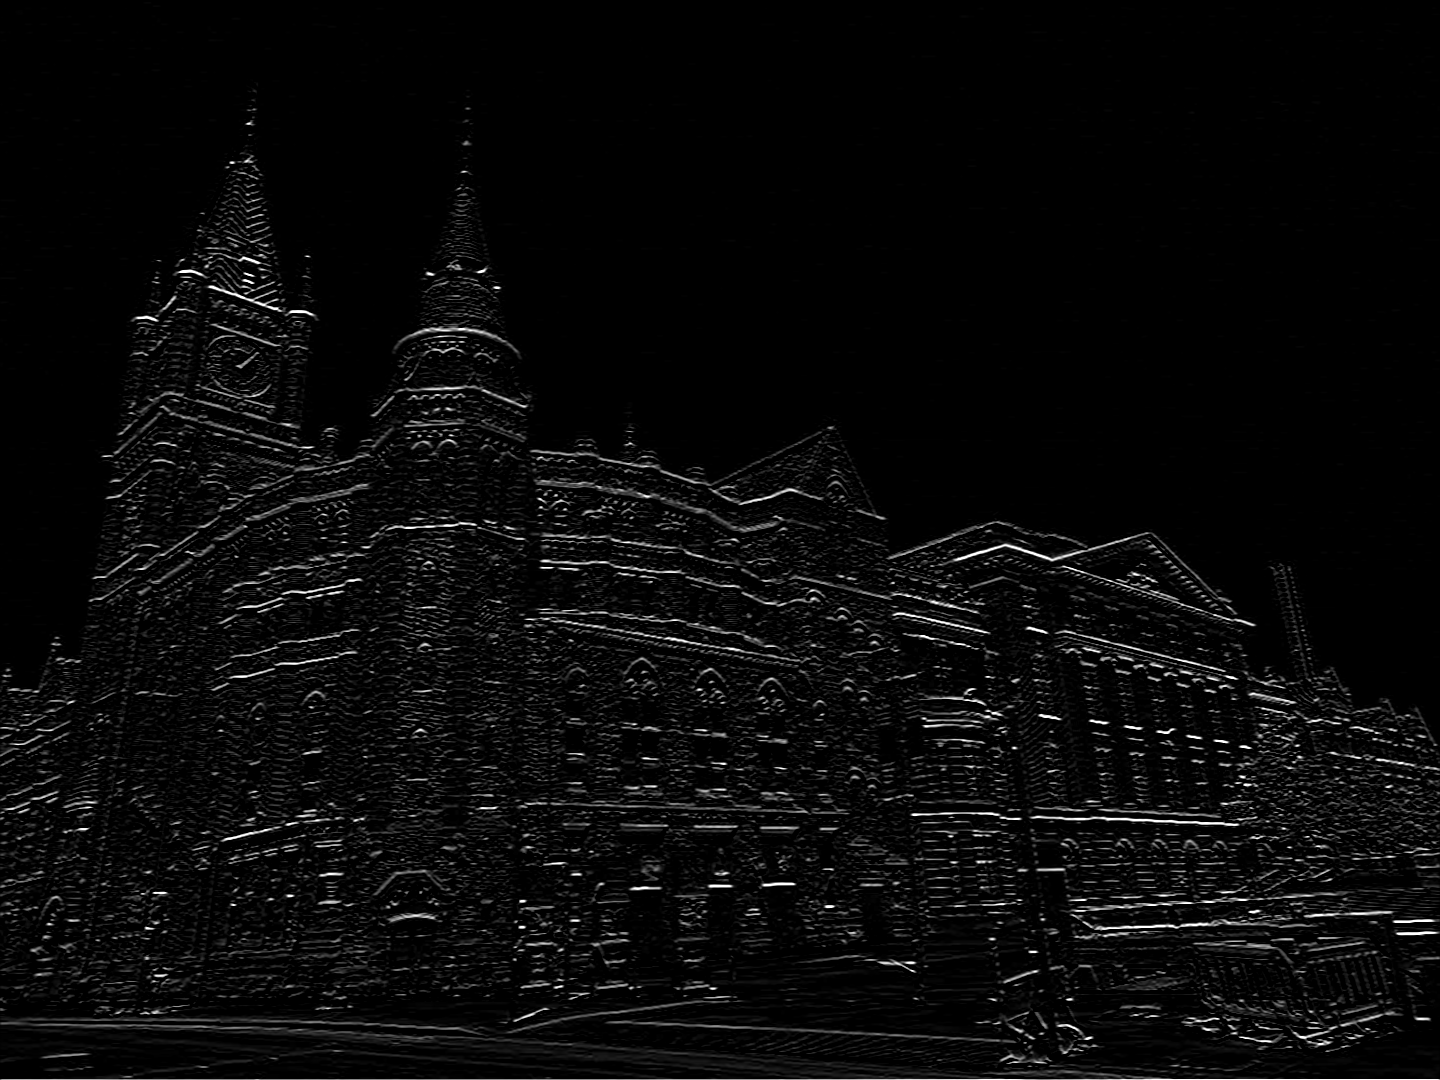

In [57]:
#Gaussian mask: size: 5x5, sigma = 1.5
g_kernel = gaussian_kernel(5, 1.5)

#Gaussian derivative in the x direction
der_x = np.array([-1,1])
der_x.shape = [1,2] #To make it as the 2D array
gdmask_x = convolution(g_kernel, der_x)
gdmask_img1 = convolution(img_grey, gdmask_x, average=False)
cv2_imshow(gdmask_img1)

#Gaussian derivative in the y direction
der_y = np.transpose(der_x)
gdmask_y = convolution(g_kernel, der_y)
gdmask_img2 = convolution(img_grey, gdmask_y, average=False)
cv2_imshow(gdmask_img2)

4. Laplacian of Gaussian (LoG mask)

Image Shape : (5, 5)
Kernel Shape : (3, 3)
Output Image size : (5, 5)
Image Shape : (1080, 1440)
Kernel Shape : (5, 5)
Output Image size : (1080, 1440)


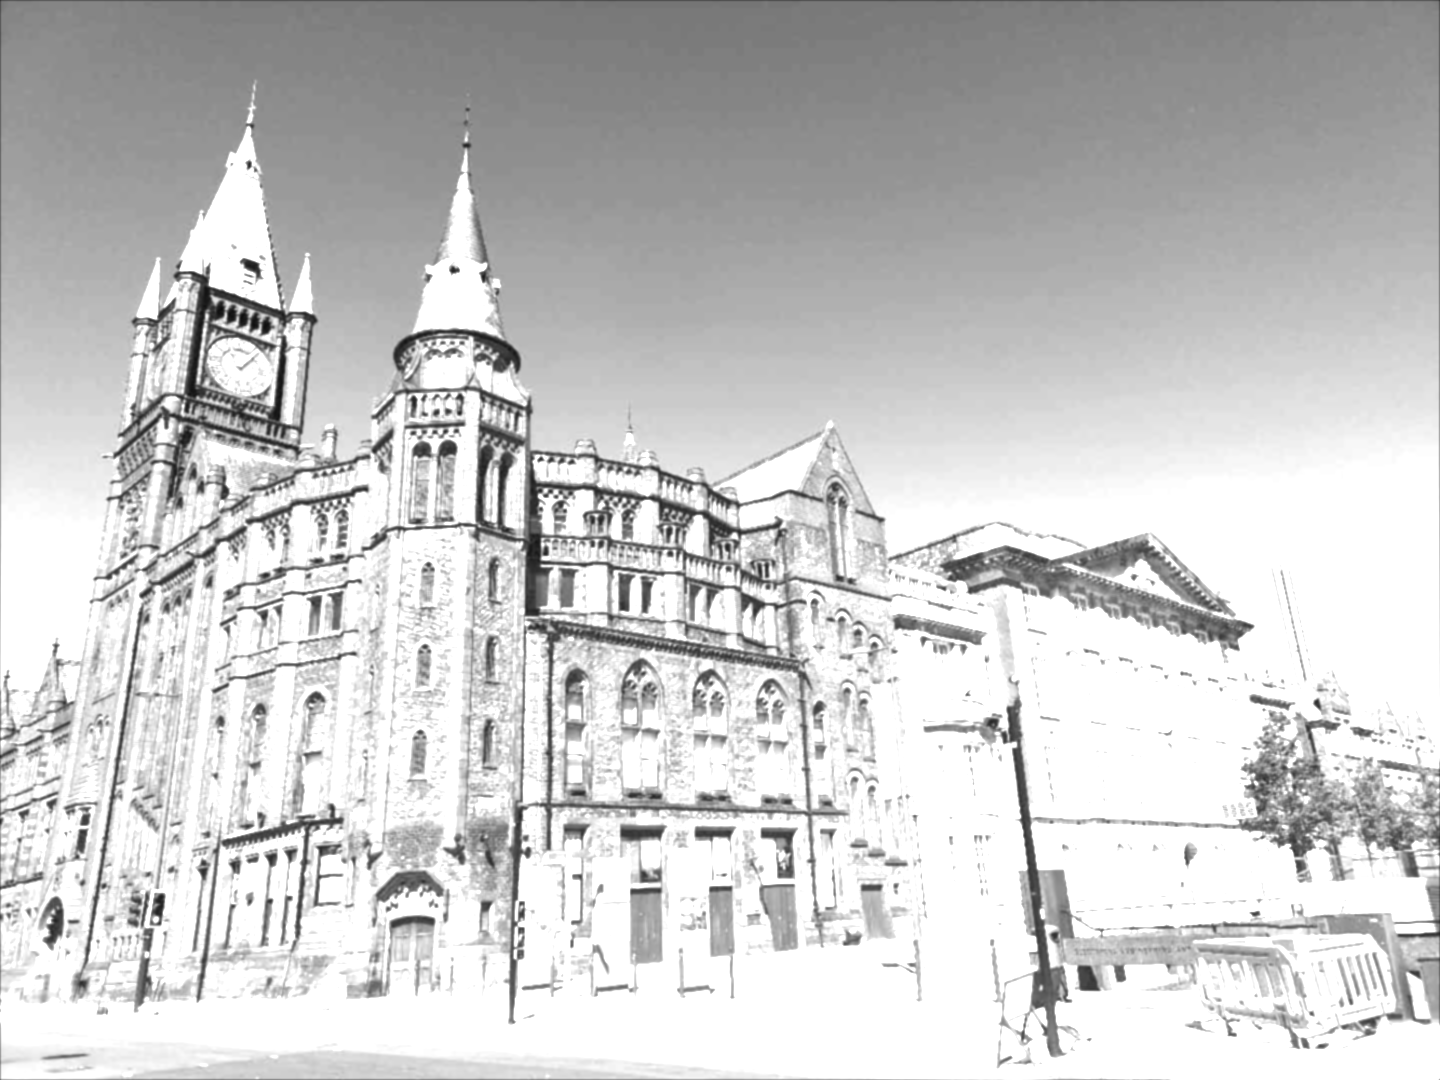

Image Shape : (5, 5)
Kernel Shape : (3, 3)
Output Image size : (5, 5)
Image Shape : (1080, 1440)
Kernel Shape : (5, 5)
Output Image size : (1080, 1440)


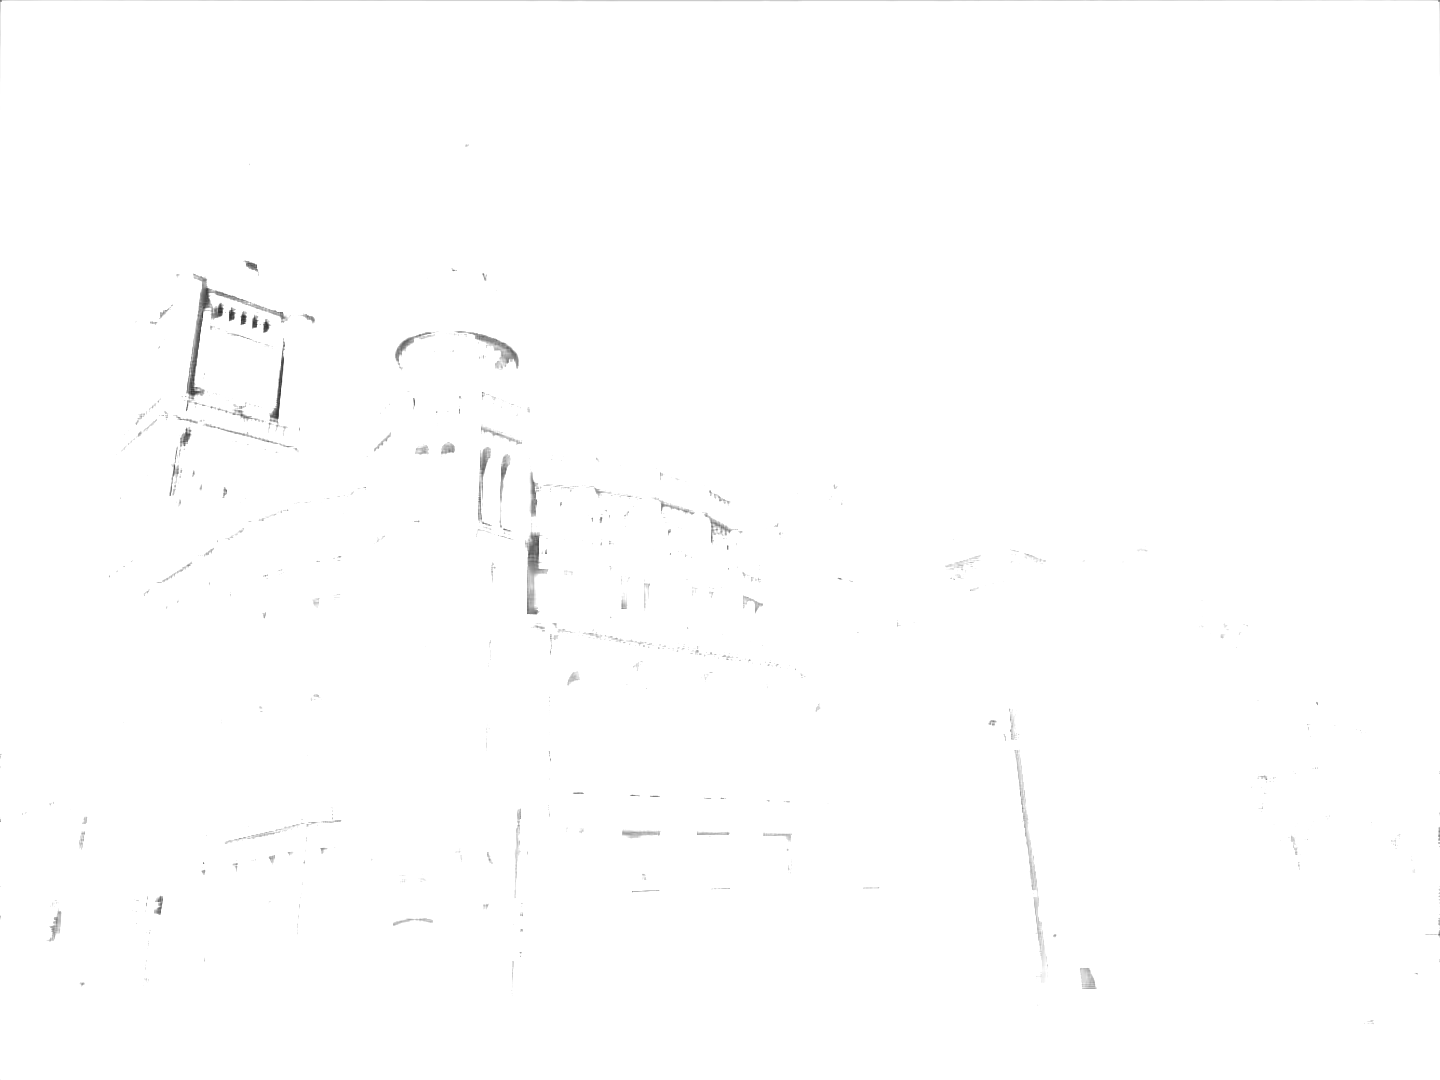

In [58]:
#Creat a Laplacian of Gaussian mask by convolving a 2D Gaussian with a Laplacian
lap_mask = np.array([[-1/8, -1/8, -1/8], [-1/8, 1, -1/8], [-1/8, -1/8, -1/8]])
g_kernel_1 = gaussian_kernel(5, 1.5)
log_mask_1 = convolution(g_kernel_1, lap_mask)
log_img_1 = convolution(img_grey, log_mask_1, average=False)
cv2_imshow(log_img_1)

g_kernel_5 = gaussian_kernel(5, 5)
log_mask_5 = convolution(g_kernel_5, lap_mask)
log_img_5 = convolution(img_grey, log_mask_5, average=False)
cv2_imshow(log_img_5)

5. Difference of Gaussian (DoG mask)

Image Shape : (1080, 1440)
Kernel Shape : (5, 5)
Output Image size : (1080, 1440)


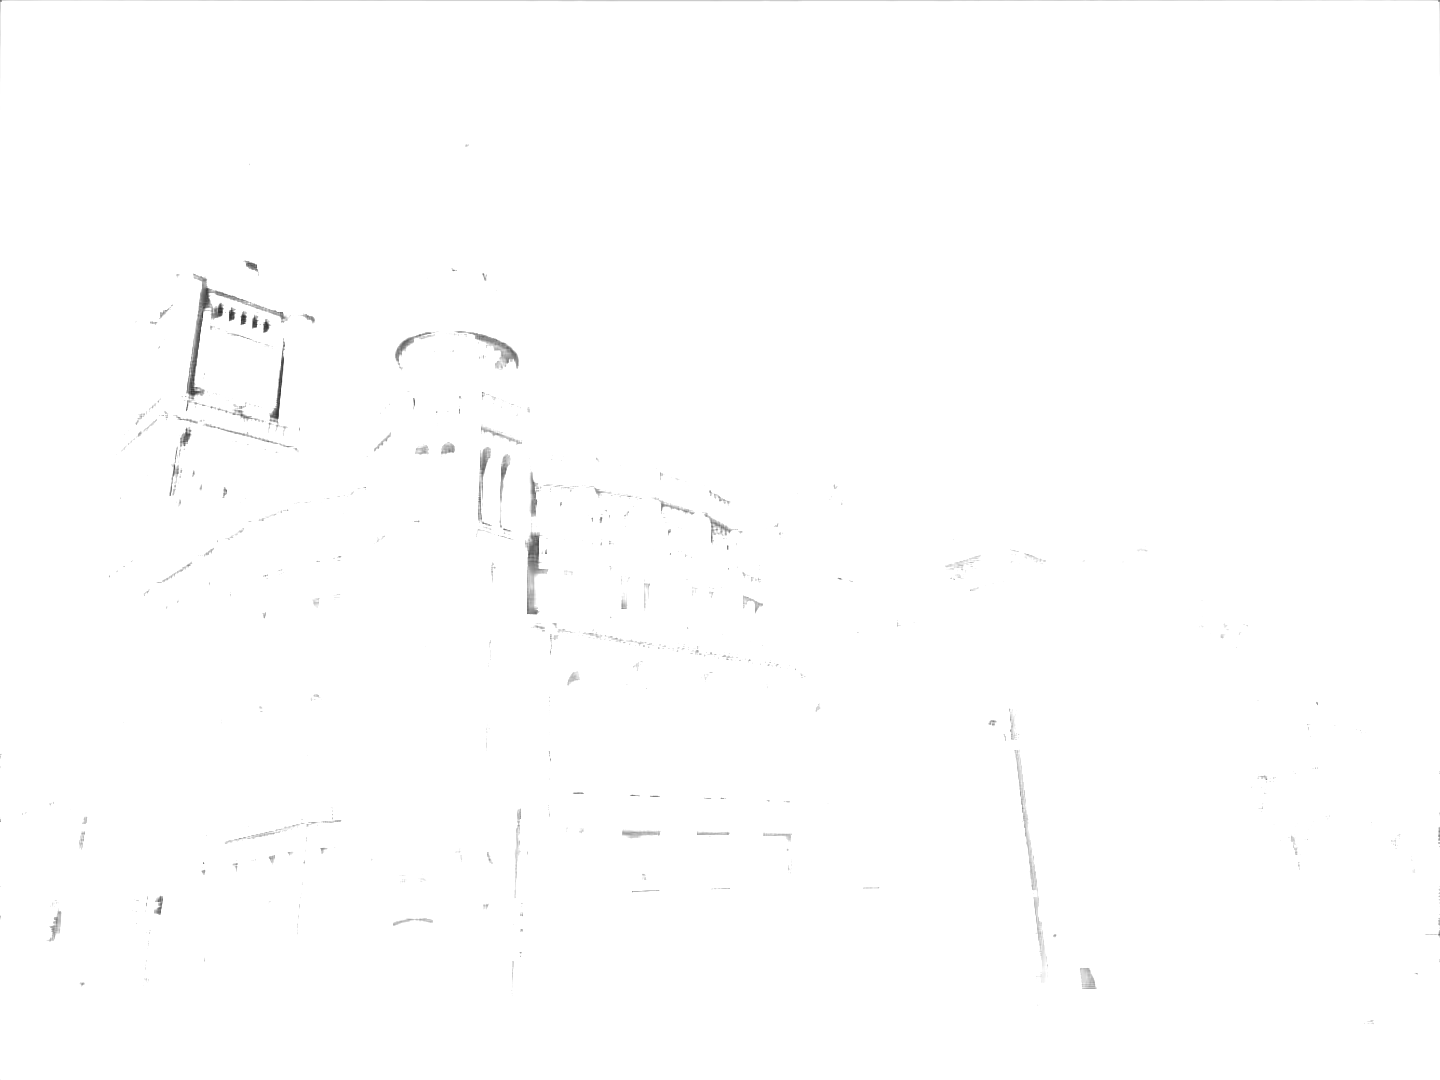

In [59]:
#Create a DoG mask by substracting one Gaussian from another
g_kernel_3 = gaussian_kernel(5, 3)
g_kernel_6 = gaussian_kernel(5, 6)
dog_mask = g_kernel_3 - g_kernel_6
dog_img_1 = convolution(img_grey, dog_mask, average=False)
cv2_imshow(log_img_5)

6. Edge detection with a Canny edge detector

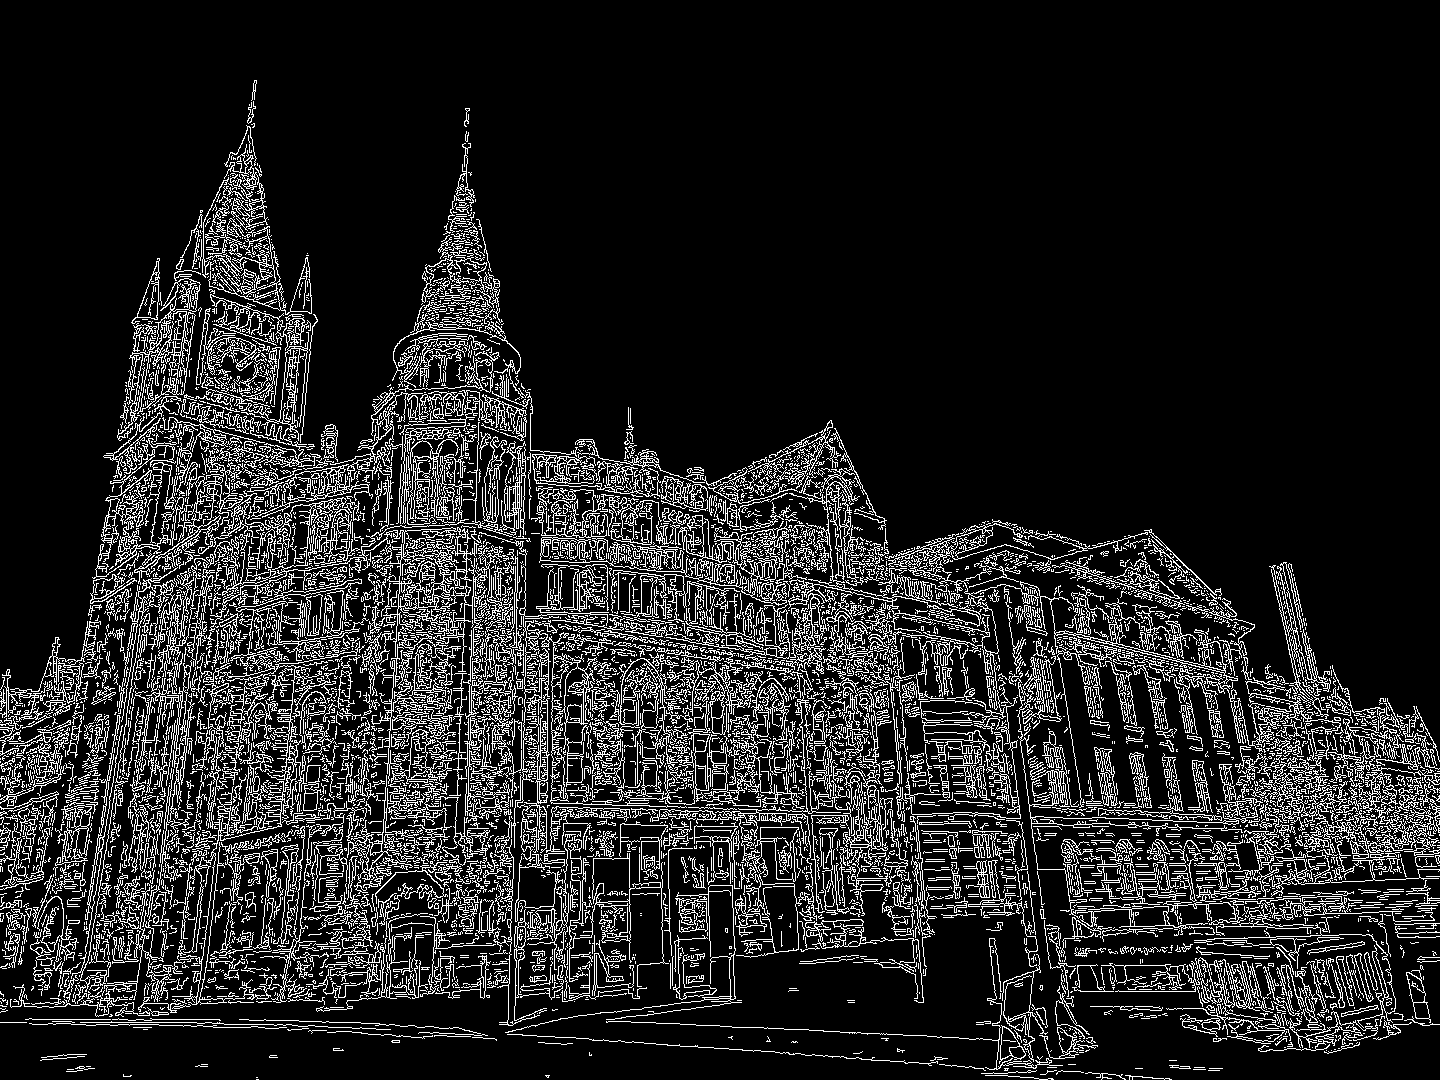

In [60]:
#cv2.Canny(): First argument is our input image. Second and third arguments are our minVal and maxVal respectively.
#See more: https://docs.opencv.org/3.4/da/d5c/tutorial_canny_detector.html
edges = cv2.Canny(img_grey,100,200)
cv2_imshow(edges)